## Assignment 2
Jonathan Pichot

In [295]:
import os
import pandas as pd
import geopandas as gpd
import zipfile
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering 

In [3]:
if os.getenv("PUIDATA"):
    data_path = os.getenv("PUIDATA")
else:
    os.system('mkdir data')
    data_path = "./data"

## Get and prep data

In [5]:
for y in ["94", "95", "96", "97", "98", "99", "00", "01"]:
    dl_path = data_path + "/" + y + "totals.zip"
    command = "wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp%stotals.zip -O %s" % (y, dl_path)
    print(command)
    os.system(command)

wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp94totals.zip -O ./data/94totals.zip
wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp95totals.zip -O ./data/95totals.zip
wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp96totals.zip -O ./data/96totals.zip
wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp97totals.zip -O ./data/97totals.zip
wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp98totals.zip -O ./data/98totals.zip
wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp99totals.zip -O ./data/99totals.zip
wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp00totals.zip -O ./data/00totals.zip
wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp01totals.zip -O ./data/01totals.zip


In [4]:
for y in ["02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14"]:
    dl_path = data_path + "/" + y + "totals.zip"
    command = "wget ftp://ftp.census.gov/econ20%s/CBP_CSV/zbp%stotals.zip -O %s" % (y, y, dl_path)
    print(command)
    os.system(command)

wget ftp://ftp.census.gov/econ2002/CBP_CSV/zbp02totals.zip -O ./data/02totals.zip
wget ftp://ftp.census.gov/econ2003/CBP_CSV/zbp03totals.zip -O ./data/03totals.zip
wget ftp://ftp.census.gov/econ2004/CBP_CSV/zbp04totals.zip -O ./data/04totals.zip
wget ftp://ftp.census.gov/econ2005/CBP_CSV/zbp05totals.zip -O ./data/05totals.zip
wget ftp://ftp.census.gov/econ2006/CBP_CSV/zbp06totals.zip -O ./data/06totals.zip
wget ftp://ftp.census.gov/econ2007/CBP_CSV/zbp07totals.zip -O ./data/07totals.zip
wget ftp://ftp.census.gov/econ2008/CBP_CSV/zbp08totals.zip -O ./data/08totals.zip
wget ftp://ftp.census.gov/econ2009/CBP_CSV/zbp09totals.zip -O ./data/09totals.zip
wget ftp://ftp.census.gov/econ2010/CBP_CSV/zbp10totals.zip -O ./data/10totals.zip
wget ftp://ftp.census.gov/econ2011/CBP_CSV/zbp11totals.zip -O ./data/11totals.zip
wget ftp://ftp.census.gov/econ2012/CBP_CSV/zbp12totals.zip -O ./data/12totals.zip
wget ftp://ftp.census.gov/econ2013/CBP_CSV/zbp13totals.zip -O ./data/13totals.zip
wget ftp://ftp.c

In [16]:
years = ["94", "95", "96", "97", "98", "99", "00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14"]

In [41]:
totals = {}

for y in years:
    zf = zipfile.ZipFile("data/%stotals.zip" % (y))
    df = pd.read_csv(zf.open("zbp%stotals.txt" % (y)))
    
    if "est" in df.columns:
        df.index = df["zip"]
        df = df.loc[:, ["est"]]
        df.columns = [y]
        totals[y] = df
    if "EST" in df.columns:
        df.index = df["ZIP"]
        df = df.loc[:, ["EST"]]
        df.columns = [y]
        totals[y] = df

In [52]:
# Create consolidated dataframe with a column per 'establishments' per year
dfEcon = totals["94"]
for y in years[1:]:
    dfEcon = dfEcon.merge(totals[y], how="inner", left_index=True, right_index=True)

In [57]:
nyc_zips = gpd.read_file('nyc-ziptabs.geojson')

In [95]:
# Find all unique zip codes for NYC
dfNyc = dfEcon.loc[nyc_zips.postalCode.astype('int').unique(), :].dropna()

In [98]:
dfNyc.shape

(230, 21)

subtract the mean and divide each time series (separately) by its standard deviation

In [241]:
dfNycStd = (dfNyc.T.subtract(dfNyc.T.mean()) / dfNyc.T.std())

In [242]:
dfNycStd.head()

,11372,11004,11040,11426,11365,11373,11001,11375,11427,11374,...,10278,10155,10022,10043,10081,10080,10285,10286,10281,10282
94,-1.650515,-0.974535,-0.118051,3.212291,-1.332578,-1.459619,-0.189661,-2.005640,-1.554103,-1.528453,...,-1.240742,-0.463163,-1.289486,0.526977,0.605700,0.190518,0.920050,-1.090263,0.879178,-1.886375
95,-1.607088,-1.248013,-0.234030,-0.444253,-1.549090,-1.298191,-0.189661,-1.194027,-1.484591,-1.519285,...,-1.917510,0.509480,-0.231789,0.182191,0.125711,0.157201,1.232769,-1.163412,0.929650,-1.886375
96,-1.259673,-1.794968,-1.379327,-0.785986,-1.454366,-1.369219,-0.664682,-0.738385,-1.345565,-1.445940,...,-0.902358,0.509480,0.394195,0.159947,-0.354278,0.154424,1.506398,-1.382858,0.906096,-1.741904
97,-1.154208,-1.065695,-1.248850,-1.161892,-0.926619,-1.188420,-1.212784,-1.179788,-0.963246,-1.500948,...,-0.902358,1.482123,0.572277,0.093214,0.125711,-0.123222,1.559702,-1.382858,1.599248,-1.149574
98,-0.893647,-0.974535,-1.248850,-0.991026,-1.102534,-0.807449,-1.103164,-0.852295,-0.789465,-1.170897,...,-0.902358,0.104212,1.565217,0.204435,-0.114283,-0.103787,1.293181,-1.529155,2.040039,-0.802844


## Clustering
cluster the NUMBER OF ESTABLISHMENTS time series with K-means in **a few** clusters (as discussed there is no real good, sound way to decide what a good number is here. try a few options, keeping in mind a few is more than a couple, but i recommand you stay within the single digit numbers)

In [244]:
km = KMeans(n_clusters=6, random_state=1162)
labels = km.fit_predict(dfNycStd.T)

## Plot
plot the cluster centers (if you used K means those are the means of the clusters). you can plot for example the cluster centers overlayed on each time series (using the alpha channel to control the opacity in the plot may be helpful here).

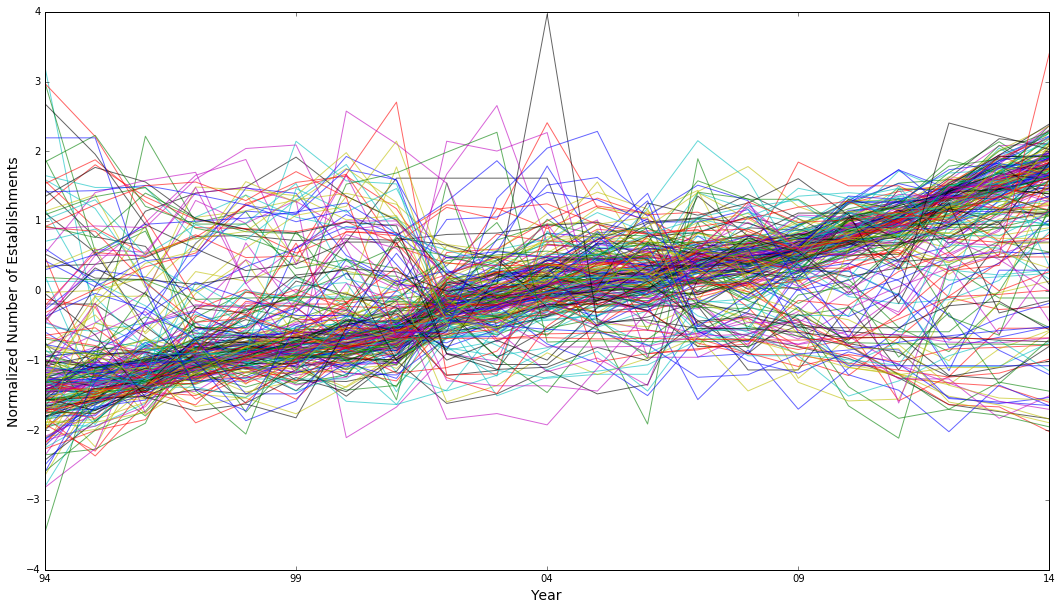

In [271]:
ax = dfNycStd.plot(figsize=(18,10), alpha=0.6, legend=False, xlim=(0,20))

ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Normalized Number of Establishments", fontsize=14)

### Figure 1: Normalized number of establishments for 230 zip codes in New York City from 1994 to 2014 

In [259]:
dfNycLab = dfNycStd.T.copy()
dfNycLab["label"] = labels

dfMean = dfNycLab.groupby("label").mean()

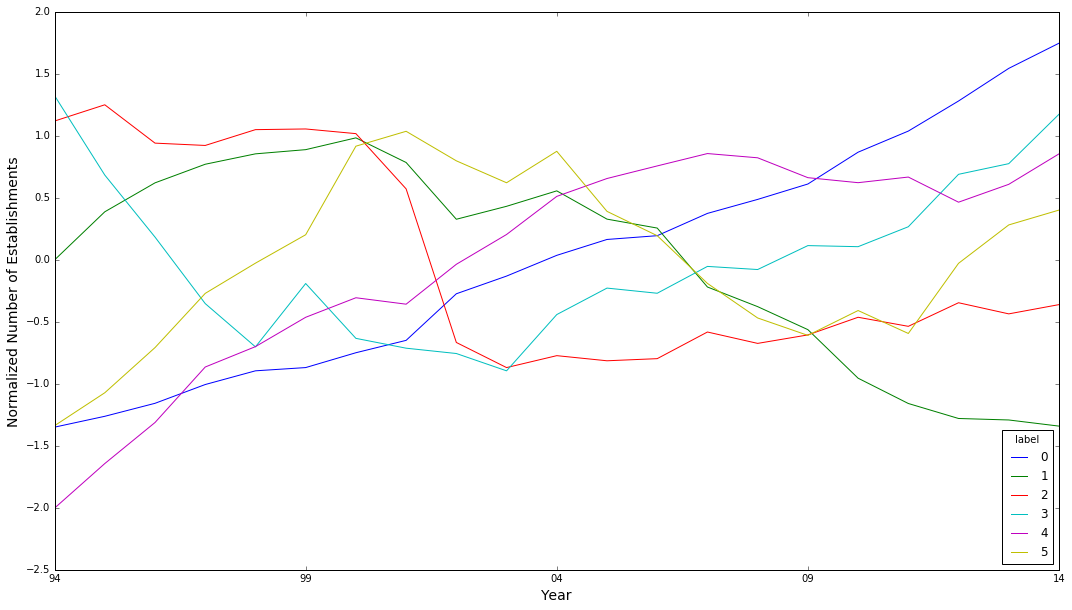

In [272]:
ax = dfMean.T.plot(figsize=(18,10), xlim=(0,20))

ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Normalized Number of Establishments", fontsize=14)

### Figure 2: Normalized number of establishments for 6 KMeans clusters of zip codes in New York City from 1994 to 2014

## Use another clustering algorithm (of your choice)

In [299]:
sc = SpectralClustering(n_clusters=6, random_state=1162)
scLabels = sc.fit_predict(dfNycStd.T)

In [300]:
scLabels

array([1, 0, 0, 0, 1, 3, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 5, 2, 0, 5, 2,
       1, 1, 5, 2, 2, 5, 1, 5, 1, 3, 1, 3, 2, 5, 5, 0, 0, 0, 2, 2, 5, 0, 5,
       2, 0, 5, 2, 0, 0, 1, 2, 0, 5, 1, 2, 5, 3, 5, 3, 1, 5, 0, 0, 5, 1, 0,
       5, 2, 0, 5, 3, 3, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 2, 4, 5,
       1, 3, 0, 1, 1, 3, 1, 2, 0, 3, 2, 5, 0, 0, 0, 0, 0, 2, 0, 5, 0, 1, 0,
       5, 1, 2, 1, 1, 0, 0, 1, 0, 2, 5, 0, 1, 0, 5, 0, 2, 2, 1, 5, 1, 5, 1,
       1, 5, 3, 0, 1, 0, 3, 0, 5, 0, 2, 0, 0, 3, 5, 0, 2, 2, 0, 0, 2, 2, 2,
       5, 0, 1, 1, 3, 2, 1, 0, 3, 5, 0, 1, 5, 0, 0, 5, 2, 0, 0, 4, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [303]:
dfNycLabSc = dfNycStd.T.copy()
dfNycLabSc["label"] = scLabels

dfMeanSc = dfNycLabSc.groupby("label").mean()

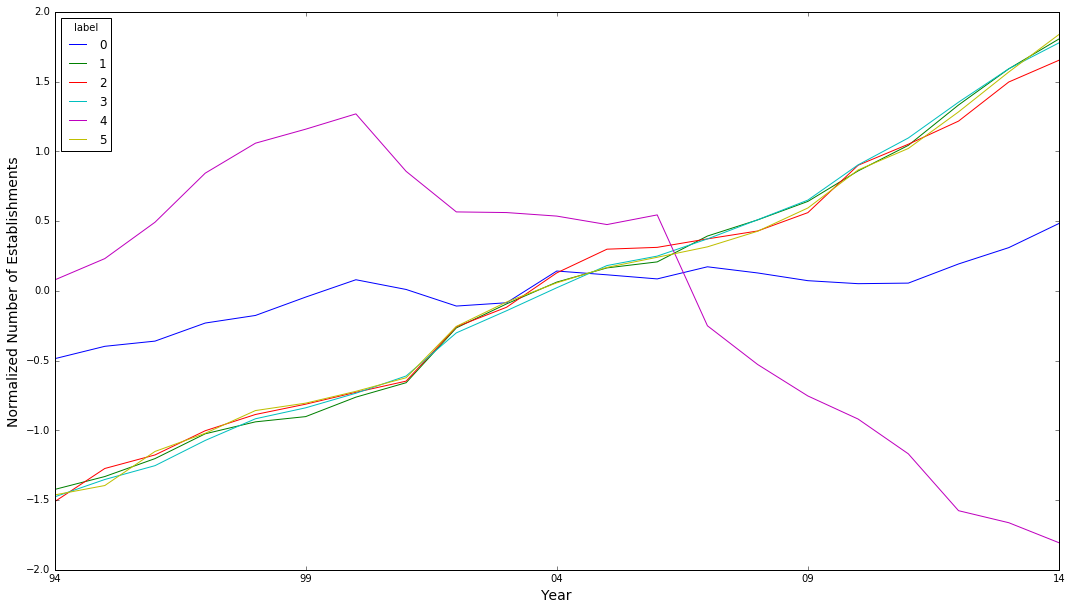

In [304]:
ax = dfMeanSc.T.plot(figsize=(18,10), xlim=(0,20))

ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Normalized Number of Establishments", fontsize=14)

### Figure 3: Normalized number of establishments for 6 Spectral clusters of zip codes in New York City from 1994 to 2014

## Map
overlay your data on a NYC map: you can use shapefiles for the zip codes and different colors for different clusters

In [326]:
nyc_zips = nyc_zips.loc[:, ["postalCode", "geometry"]]
nyc_zips["postalCode"] = nyc_zips["postalCode"].astype("int")

In [327]:
kmZip = dfNycLab.loc[:, ["label"]]
kmNyc = nyc_zips.merge(kmZip, left_on="postalCode", how="inner", right_index=True)

In [329]:
scZip = dfNycLabSc.loc[:, ["label"]]
scNyc = nyc_zips.merge(scZip, left_on="postalCode", how="inner", right_index=True)

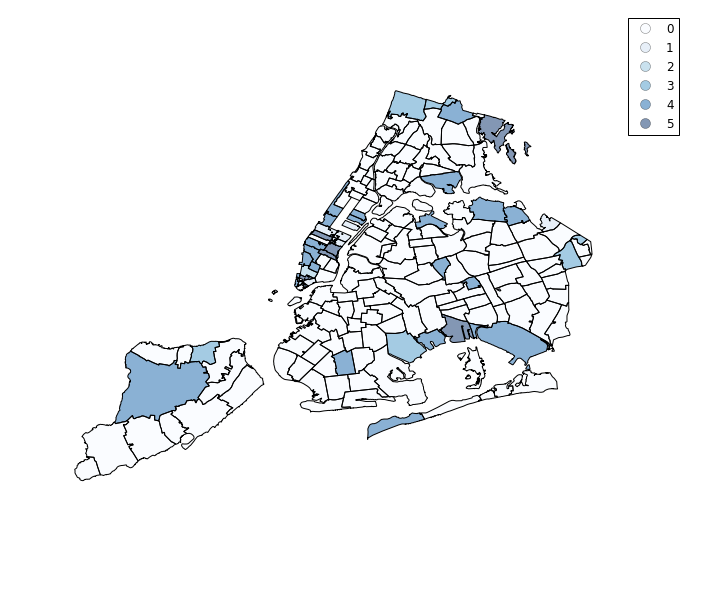

In [359]:
ax = kmNyc.plot(column="label", cmap="Blues", figsize=(18,10), categorical=True, legend=True)
ax.set_axis_off()

### Figure 4: Map of zip codes colored by 6 KMean clusters

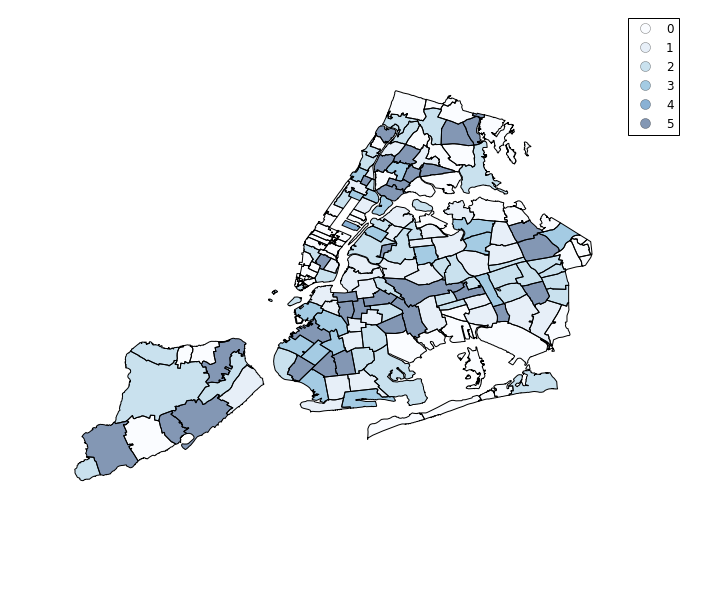

In [361]:
ax = scNyc.plot(column="label", cmap="Blues", figsize=(18,10), categorical=True, legend=True)
ax.set_axis_off()

### Figure 5: Map of zip codes colored by 6 Spectural clusters

In [367]:
kmNyc.groupby("label").count()

,postalCode,geometry
label,,
0,151,151
1,21,21
2,13,13
3,14,14
4,29,29
5,15,15


In [368]:
scNyc.groupby("label").count()

,postalCode,geometry
label,,
0,109,109
1,34,34
2,45,45
3,19,19
4,4,4
5,32,32


## Interpretation

Both clustering techniques found one cluster to have significantly more zip codes then the others. This cluster for KMeans, was also the cluster that showed the strongest upward trend in number of establishments over time, the largest Spectural cluster, instead, showed a more flat trend, while several smaller clusters showed a strong upward trend.

Looking at the maps of the clusters, it appears that KMeans cluster 0, it's largest, represents a large swath of NYC that is not Manhattan, but that borders it somehow. We can interpret this to mean that the areas around Manhattan are showing the strongest relative growth in number of establishments over the defined period. This makes sense, as Manhattan, with its already stronger density of businesses, has a harder time to grow at the same relative pace.

The spectural clustering, instead, found a patchwork of clusters geographically. It's difficult to make an interpretation here, as this clustering technique might not be best suited to geographic data.